In [1]:
import torch
torch.cuda.is_available()
torch.cuda.device_count()
torch.cuda.get_device_name(0)

AssertionError: Torch not compiled with CUDA enabled

In [2]:
import utils
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import cv2 as cv


In [3]:
foo = utils.VideoSubExtractor('out3.mp4')

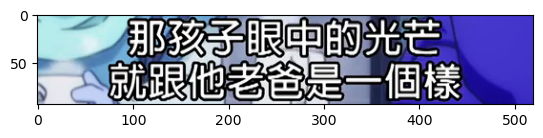

In [4]:
ret, frame = utils.get_frame_n(foo.cap, 9120)
plt.imshow(frame)

In [5]:
from segment_anything import SamPredictor, sam_model_registry
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = 0

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

AssertionError: Torch not compiled with CUDA enabled

In [6]:

from segment_anything import SamAutomaticMaskGenerator

import importlib
importlib.reload(utils)


<module 'utils' from '/Users/benjidayan/coding/hunter_subs/utils.py'>

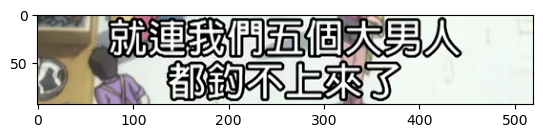

In [7]:
n = 4750
ret, frame = utils.get_frame_n(foo.cap, n)
frame = cv.cvtColor(frame, cv.COLOR_RGB2BGR)
# frame = frame[3:-1, :]
mask_generator = SamAutomaticMaskGenerator(sam)
img = frame
masks = mask_generator.generate(img)
plt.imshow(frame)

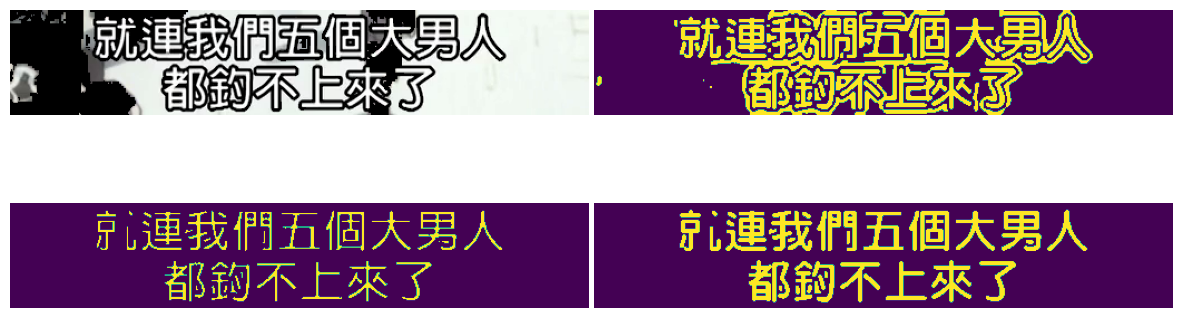

就连墩.;人
##########
京`连我们五个大男/
都钓不二来了
##########
京连我们五个大男人
都钓不上来了


In [78]:
frame2 = utils.blacken_colored_pixels(frame)

ocr, ocr_sam, ocr_sam_grow = utils.quick_process_frame(sam, frame2)

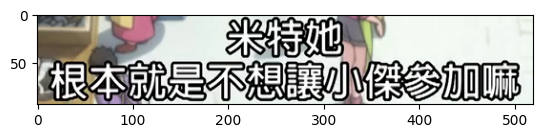

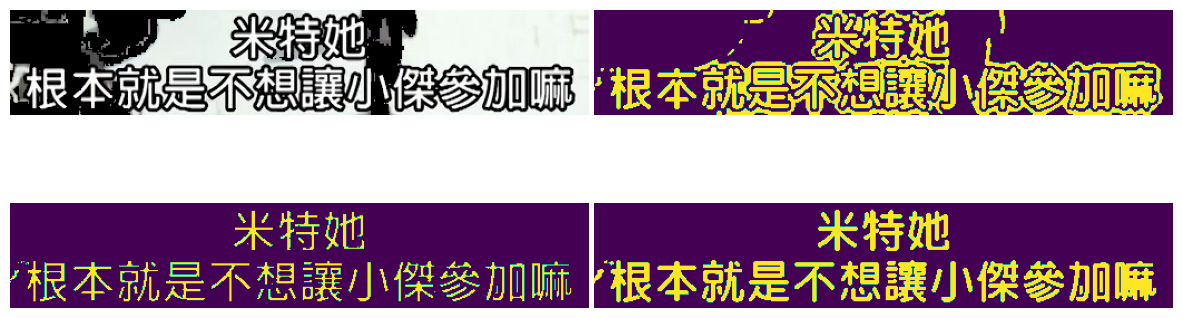

米特她
根本就是不短茧杰参枷嘛
##########
米特她
根本就是不想让杰参加嘛
##########
米特她
`根本就是不想让小杰参加嘛


In [79]:
n = 4900
ret, frame = utils.get_frame_n(foo.cap, n)
frame = cv.cvtColor(frame, cv.COLOR_RGB2BGR)
# frame = frame[3:-1, :]
mask_generator = SamAutomaticMaskGenerator(sam)
img = frame
masks = mask_generator.generate(img)
plt.imshow(frame)

frame2 = utils.blacken_colored_pixels(frame)

ocr, ocr_sam, ocr_sam_grow = utils.quick_process_frame(sam, frame2)

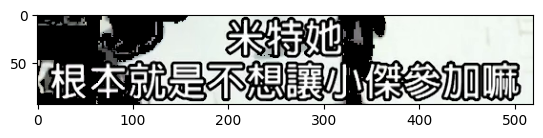

In [80]:
plt.imshow(frame2)

<Figure size 640x480 with 0 Axes>

92.07617


<Figure size 640x480 with 0 Axes>

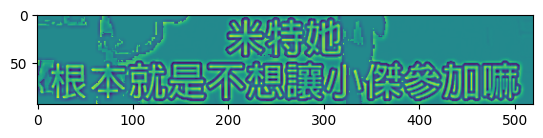

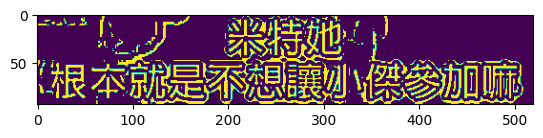

In [87]:
size = 8
img_gray = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)

kernel = np.ones((size,size),np.float32)/(size*size)
filtered= cv.filter2D(img_gray,-1,kernel)
filtered = img_gray.astype('float32') - filtered.astype('float32')
filtered = filtered + 127*np.ones(img_gray.shape, np.uint8)

# do thresholding to get just the "bright" stuff
HIGHPASS_THRESH = 180
# BRIGHT_THRESH = 240
BRIGHT_THRESH = 230

plt.figure()
plt.imshow(filtered)

highpass_thresh = threshold_otsu(filtered)
print(highpass_thresh)
highpass_thresh=HIGHPASS_THRESH
white_hp = filtered > highpass_thresh
plt.figure()
plt.imshow(white_hp)

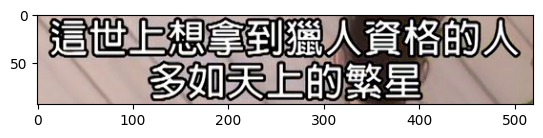

In [73]:
n = 25900
ret, frame = utils.get_frame_n(foo.cap, n)
frame = cv.cvtColor(frame, cv.COLOR_RGB2BGR)
# frame = frame[3:-1, :]
mask_generator = SamAutomaticMaskGenerator(sam)
img = frame
masks = mask_generator.generate(img)
plt.imshow(frame)

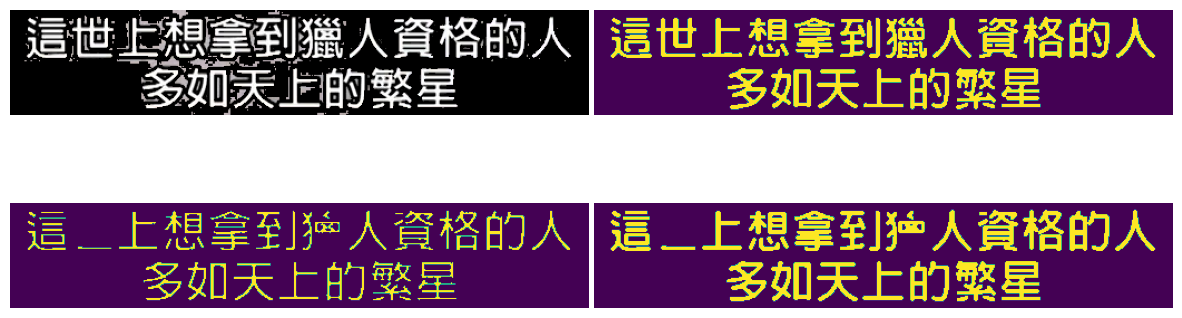

这世上想拿到猎人资格的人
多如天上的槃星
##########
这_上想掌到犷人资格的/
多如天二的繁星
##########
这_上想拿到犷人资格的人
多如天上的槃星


In [74]:
frame2 = utils.blacken_colored_pixels(frame)

ocr, ocr_sam, ocr_sam_grow = utils.quick_process_frame(sam, frame2)

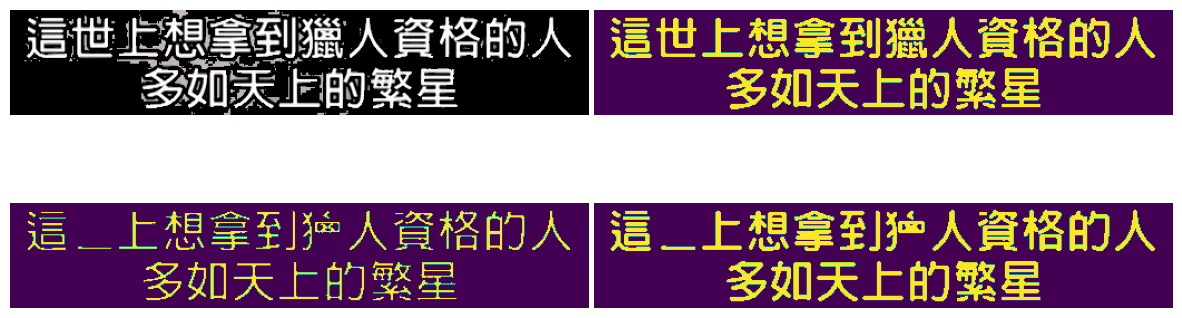

这世上想拿到猎人资格的人
多如天上的槃星
##########
这_上想掌到犷人资格的/
多如天二的繁星
##########
这_上想拿到犷人资格的人
多如天上的槃星


In [76]:
frame2 = utils.blacken_colored_pixels(frame)

ocr, ocr_sam, ocr_sam_grow = utils.quick_process_frame(sam, frame2)

(94, 520, 3)

(94, 520)

/tmp/ipykernel_39058/2378182792.py:9: RuntimeWarning: invalid value encountered in divide
  out = max_abs_dist/frame_max_pixel


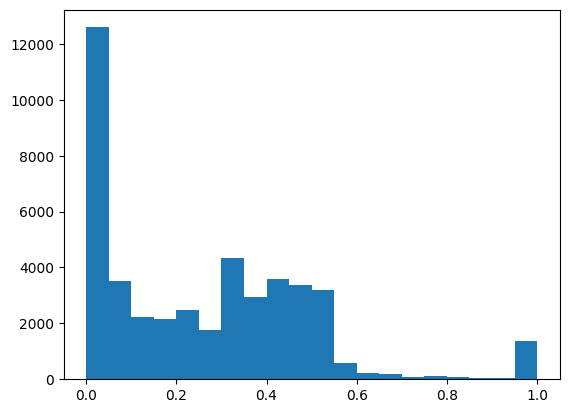

In [57]:
# set all pixels in frame which are a shade of colour which is not on the white grey black spectrum, to black
frame.shape
frame_r, frame_g, frame_b = frame[:, :, 0], frame[:, :, 1], frame[:, :, 2]
frame_r, frame_g, frame_b = frame_r.astype(np.float32), frame_g.astype(np.float32), frame_b.astype(np.float32)
frame_max_pixel = np.max(frame, axis=2)
np.abs(frame_r - frame_g).shape
dists = np.stack([np.abs(frame_r - frame_g), np.abs(frame_r - frame_b), np.abs(frame_g - frame_b)], axis=2)
max_abs_dist = np.max(dists, axis=2)
out = max_abs_dist/frame_max_pixel

frame2 = frame.copy()
frame2[out > 0.07] = np.array([0, 0, 0])

_ = plt.hist(out.flatten(), bins=20)
# max_abs_dist = np.max(np.abs(frame_r - frame_g), np.abs(frame_r - frame_b), np.abs(frame_g - frame_b))
# max_abs_dist.shape

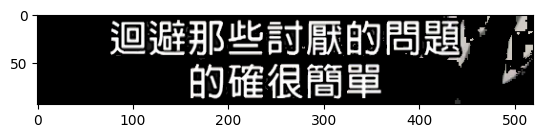

In [68]:
frame2 = frame.copy()
frame2[out > 0.07] = np.array([0, 0, 0])
plt.imshow(frame2)

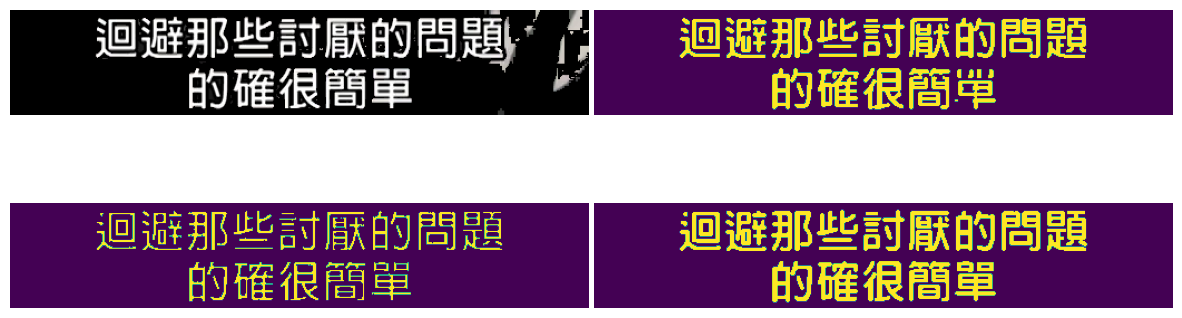

回避那些讨厌的问题
的确很简单
##########
回避那些讨厌的问题
的确很简单
##########
回避那些讨厌的问题
的确很简单


In [69]:
ocr, ocr_sam, ocr_sam_grow = utils.quick_process_frame(sam, frame2)

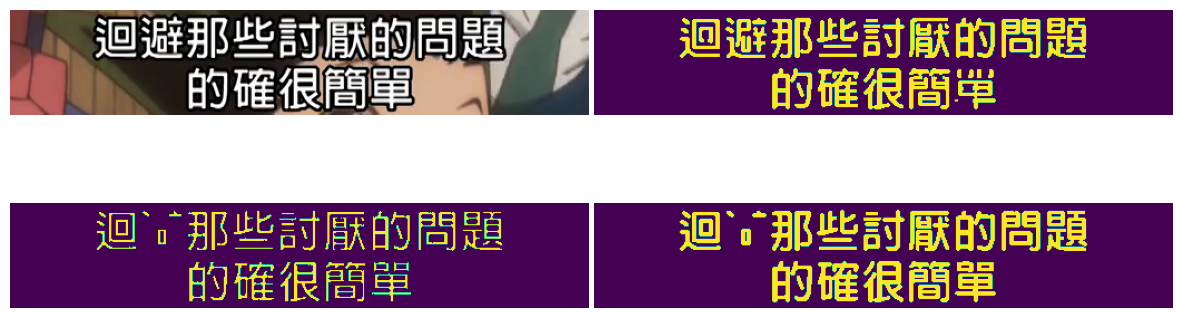

回避那些讨厌的问题
的确很简单
##########
回
那些讨厌的问题
的确很简单
##########
回
那些讨厌的问题
的确很简单


In [23]:
ocr, ocr_sam, ocr_sam_grow = utils.quick_process_frame_n2(sam, foo.cap, n)

In [32]:
from utils import *

line1_masks = []
line2_masks = []
other_masks = []
for mask in masks:
    bbox = mask['bbox']
    x, y, w, h = bbox
    if check_box_size(bbox, upper_bound=True, lower_bound=False):
        if check_box_within_y_tramlines(bbox, Y_MID1):
            line1_masks.append(mask)
        elif check_box_within_y_tramlines(bbox, Y_MID2):
            line2_masks.append(mask)
        other_masks.append(mask)

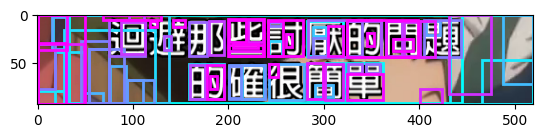

In [38]:
plt.imshow(frame)
for i, mask in enumerate(masks):
    box = mask['bbox']
    ax = plt.gca()
    # plot a different color each box
    color = plt.cm.cool(i / len(other_masks))
    utils.show_box(box, ax, color=color, marker=None)

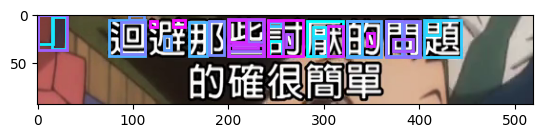

In [26]:
plt.imshow(frame)
for i, mask in enumerate(line1_masks):
    box = mask['bbox']
    ax = plt.gca()
    # plot a different color each box
    color = plt.cm.cool(i / len(line1_masks))
    utils.show_box(box, ax, color=color, marker=None)

In [36]:
pot_masks = []
for mask in masks:
    bbox = mask['bbox']
    x, y, w, h = bbox
    if 80 < x < 170:
        pot_masks.append(mask)
        

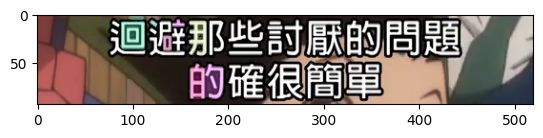

In [37]:
plt.imshow(frame)
utils.show_anns(pot_masks)

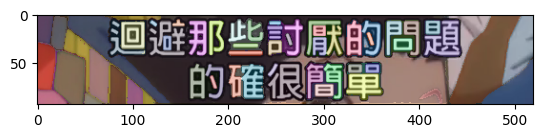

In [27]:
plt.imshow(frame)
utils.show_anns(masks)

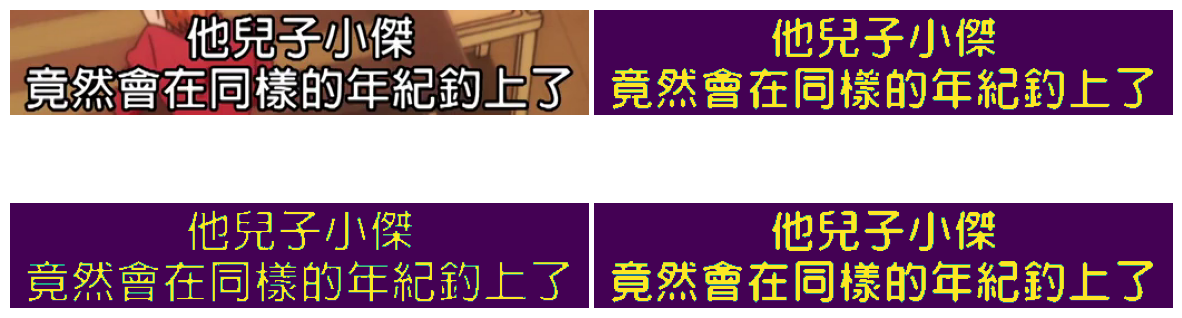

他儿子小杰
竟然曾在同样的年纪钓上了
##########
他儿子小杰
竟然会在同样的年纪钓二了
##########
他儿子小杰
竟然荟在同样的年纪钓上了


In [11]:
ocr, ocr_sam, ocr_sam_grow = utils.quick_process_frame_n2(sam, foo.cap, n)

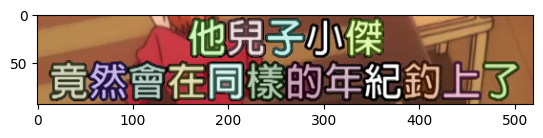

In [8]:
plt.imshow(frame)

potential_masks = []

for mask in masks:
    bbox = mask['bbox']
    x, y, w, h = bbox
    if utils.check_box_size(bbox, upper_bound=True, lower_bound=True):
        if utils.check_box_ypos(bbox, [utils.Y_MID1, utils.Y_MID2], dist=12) != -1:
            potential_masks.append(mask)

ax = plt.gca()
utils.show_anns(potential_masks)

[455.   68.5] [297.5  23. ]


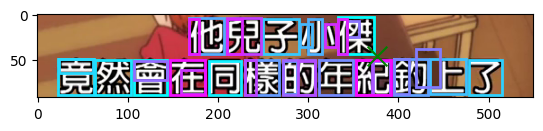

In [83]:
potential_masks = []

for mask in masks:
    bbox = mask['bbox']
    x, y, w, h = bbox
    if utils.check_box_size(bbox, upper_bound=True, lower_bound=False):
        if utils.check_box_ypos(bbox, [utils.Y_MID1, utils.Y_MID2]) != -1:
            potential_masks.append(mask)

plt.imshow(frame)
for i, mask in enumerate(potential_masks):
    box = mask['bbox']
    ax = plt.gca()
    # plot a different color each box
    color = plt.cm.cool(i / len(potential_masks))
    utils.show_box(box, ax, color=color, marker=str(i))


box1, box2 = potential_masks[8]['bbox'], potential_masks[9]['bbox']
mid1 = np.array(utils.get_box_midpoint(box1))
mid2 = np.array(utils.get_box_midpoint(box2))
print(mid1, mid2)
mid = 0.5 * (mid1 + mid2)
# round to integer
mid = np.round(mid).astype(int)
# add big cross there, brought to front
ax = plt.gca()
ax.scatter(mid[0], mid[1], marker='x', s=200, c='g', zorder=3)

    

In [59]:
len(potential_masks)

15

In [47]:
for i in [8, 5, 6, 4, 1, 0, 2, 9]:
    box = potential_masks[i]['bbox']
    mid = utils.get_box_midpoint(box)
    # mid = np.round(mid).astype(int)
    print(mid)

(105.0, 66.0)
(146.0, 67.0)
(187.5, 66.0)
(228.5, 66.0)
(270.0, 66.0)
(311.5, 66.5)
(392.5, 66.5)
(435.0, 66.0)


In [50]:
for i in [11, 10, 12, 3, 7, 14, 15, 13]:
    box = potential_masks[i]['bbox']
    mid = utils.get_box_midpoint(box)
    # mid = np.round(mid).astype(int)
    print(mid, box[2], box[3])

(124.5, 21.5) 39 39
(166.5, 21.0) 39 40
(207.0, 21.5) 38 39
(249.0, 21.5) 38 39
(289.0, 21.0) 38 40
(331.0, 21.5) 38 39
(372.0, 21.0) 40 40
(413.5, 20.5) 39 39


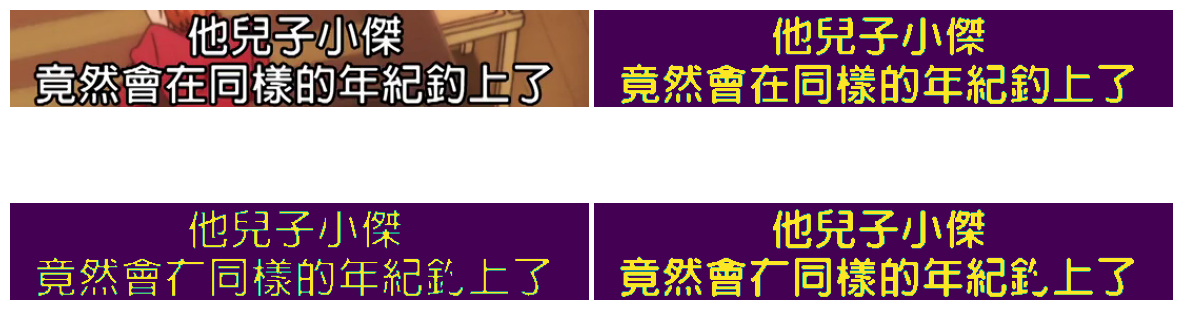

他儿子小杰
竟然曾在同样的年纪钓上了
##########
他儿子小杰
竟然荟卞同样的年纪针二了
##########
他儿子小杰
竟然荟卞同样的年纪针上了


In [65]:
n=8900
ocr, ocr_sam, ocr_sam_grow = utils.quick_process_frame_n2(sam, foo.cap, n)

In [67]:
masks[0]

{'segmentation': array([[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'area': 830,
 'bbox': [0, 0, 85, 17],
 'predicted_iou': 1.014902114868164,
 'point_coords': [[25.78125, 12.9375]],
 'stability_score': 0.980861246585846,
 'crop_box': [0, 0, 550, 92]}

False

0

[300, 5, 15, 39]

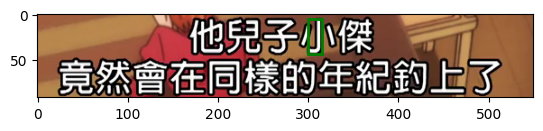

In [78]:
plt.imshow(frame)
ax = plt.gca()
utils.show_box(masks[17]['bbox'], ax)

bbox = masks[17]['bbox']

utils.check_box_size(bbox, upper_bound=True, lower_bound=True)
utils.check_box_ypos(bbox, [utils.Y_MID1, utils.Y_MID2])
bbox

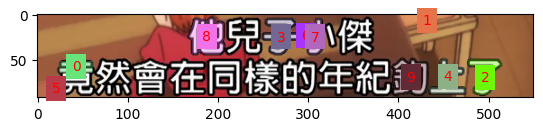

In [72]:
plt.imshow(frame)
ax = plt.gca()
utils.show_anns(masks[10:20], number=True)

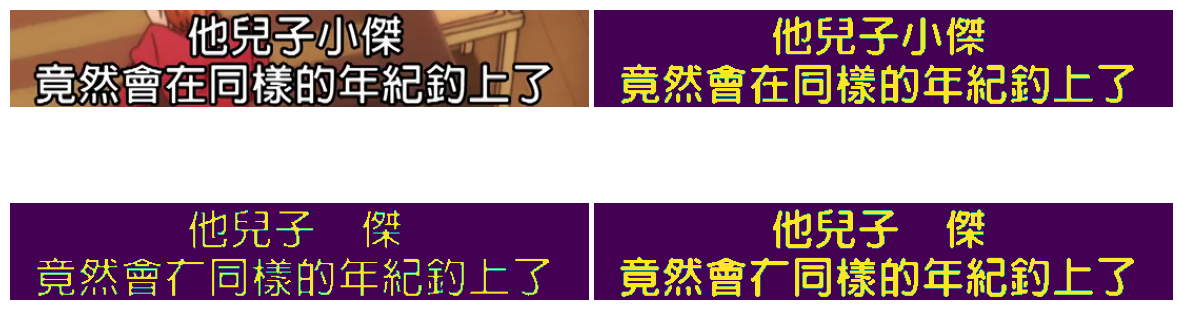

他儿子小杰
竟然曾在同样的年纪钓上了
##########
他儿子
杰
竟然荟卞同样的年纪钓上了
##########
他儿子
杰
竟然荟卞同样的年纪钓上了


In [46]:
ocr, ocr_sam, ocr_sam_grow = utils.quick_process_frame_n2(sam, foo.cap, n)

In [6]:
from segment_anything import SamAutomaticMaskGenerator
mask_generator = SamAutomaticMaskGenerator(sam)

<Figure size 640x480 with 0 Axes>

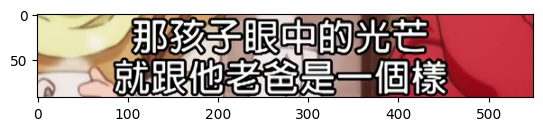

In [7]:
import cv2

# foo2.show_frame(9120)
ret, frame = get_frame_n(foo.cap, 9120)
# plt.figure()
# plt.imshow(frame)
# convert to bgr
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
plt.figure()
plt.imshow(frame)

In [19]:
output_mask = frame_to_binary_text_pixels_with_SAM(frame, sam, bright_thresh=230, grow=False)

In [20]:
def quick_process_frame_n(cap, n, **kwargs):
    ret, frame = get_frame_n(cap, n)

    output_mask1 = frame_to_binary_text_pixels(frame)
    _ = plt.figure()
    _ = plt.imshow(output_mask1)
    plt.show()
    ocr1 = ocr_frame(output_mask1)
    print(ocr1)

    output_mask = frame_to_binary_text_pixels_with_SAM(frame, sam, **kwargs)
    _ = plt.figure()
    _ = plt.imshow(output_mask)
    plt.show()
    ocr = ocr_frame(output_mask)
    print(ocr)
    return ocr1, ocr


def quick_process_frame_n2(capk, n, **kwargs):
    """Like quick_process_frame_n, but also displays original frame as an extra plot,
    and has all 3 plots in one subplot 1x3 grid"""
    ret, frame = get_frame_n(cap, n)

    output_mask = frame_to_binary_text_pixels(frame)
    output_mask_sam = frame_to_binary_text_pixels_with_SAM(frame, sam, **kwargs)
    output_mask_sam_grow = frame_to_binary_text_pixels_with_SAM(frame, sam, grow=True)

    fig, ax = plt.subplots(4, 1, figsize=(15, 5))
    ax[0].imshow(frame)
    ax[1].imshow(output_mask)
    ax[2].imshow(output_mask_sam)
    ax[3].imshow(output_mask_sam_grow)
    plt.show()

    ocr = ocr_frame(output_mask)
    print(ocr)
    print('##########')
    ocr_sam = ocr_frame(output_mask_sam)
    print(ocr_sam)
    print('##########')
    ocr_sam_grow = ocr_frame(output_mask_sam_grow)
    print(ocr_sam_grow)
    return ocr, ocr_sam, ocr_sam_grow


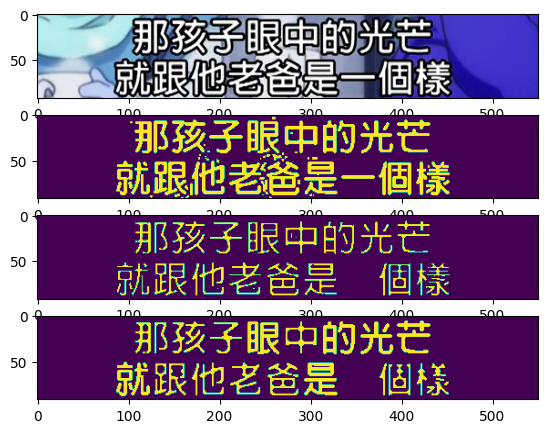

那孩.子眼中的光芒
就跟他老爸是一个样
##########
那孩子眼中的光芒
就跟他老爸是
个样
##########
那孩子眼中的光芒
就跟他老爸是
个样


In [21]:
ocr, ocr_sam, ocr_sam_grow = quick_process_frame_n2(foo.cap, 9120)

<Figure size 640x480 with 0 Axes>

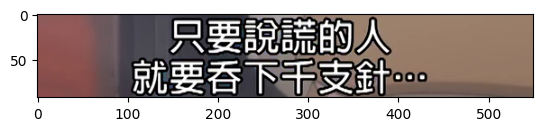

In [22]:
ret, frame = get_frame_n(foo.cap, 12000)
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
plt.figure()
plt.imshow(frame)

<Figure size 1500x500 with 0 Axes>

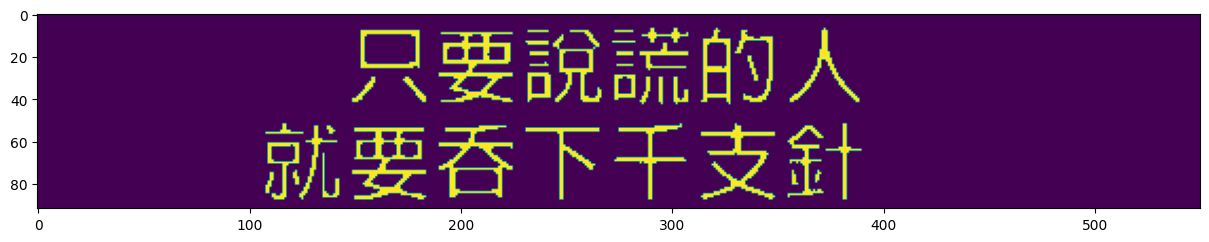

In [27]:
output_mask_sam = frame_to_binary_text_pixels_with_SAM(frame, sam)
plt.figure(figsize=(15, 5))
plt.imshow(output_mask_sam)

1

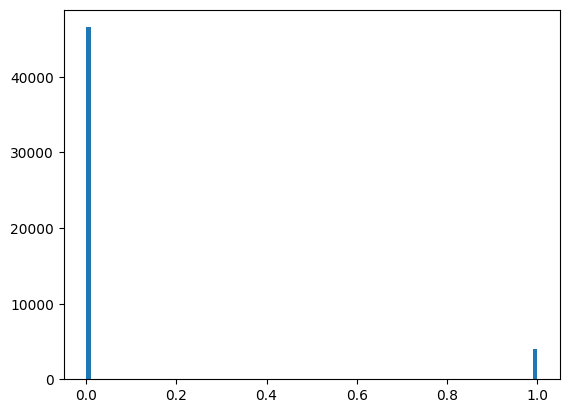

In [31]:
output_mask_sam.max()
_ = plt.hist(output_mask_sam.flatten(), bins=100)

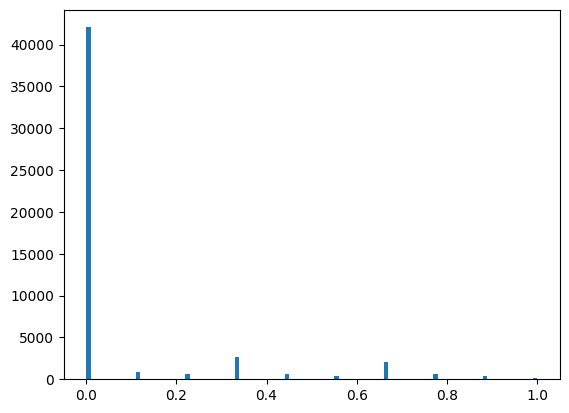

In [32]:
kernel = np.ones((3,3)) / 9
convolved = convolve(output_mask_sam.astype(np.float64), kernel)
_ = plt.hist(convolved.flatten(), bins=100)

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

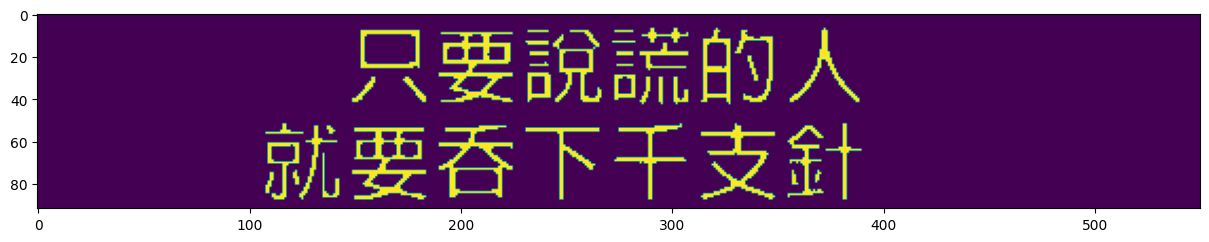

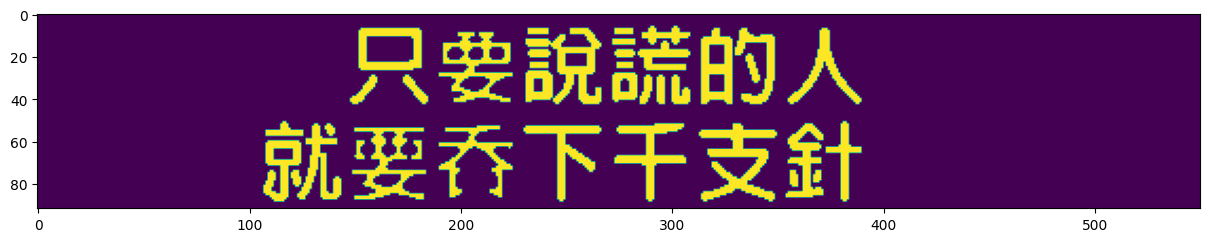

<Figure size 640x480 with 0 Axes>

threshold_otsu(convolved) = 0.22070312500000006


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

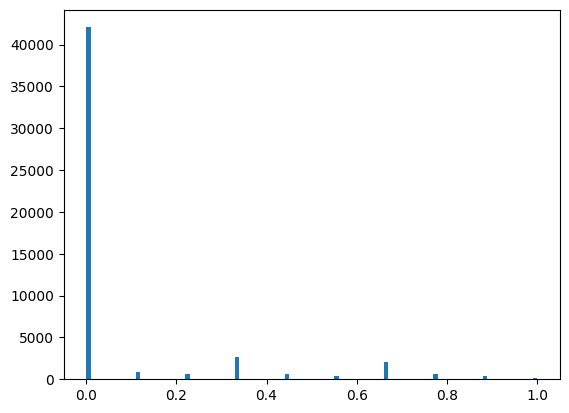

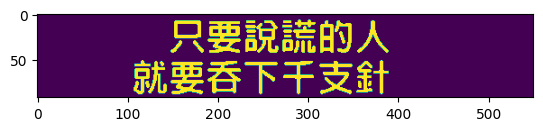

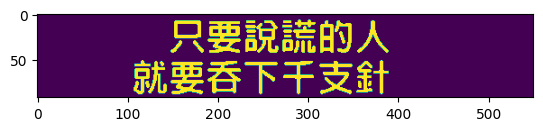

In [38]:
output_mask_sam = frame_to_binary_text_pixels_with_SAM(frame, sam)
plt.figure(figsize=(15, 5))
plt.imshow(output_mask_sam)

output_mask_sam_grown = frame_to_binary_text_pixels_with_SAM(frame, sam, grow=True)
plt.figure(figsize=(15, 5))
plt.imshow(output_mask_sam_grown)
plt.show()

kernel = np.ones((3,3)) / 9
convolved = convolve(output_mask_sam.astype(np.float64), kernel)
plt.figure()
_ = plt.hist(convolved.flatten(), bins=100)

thresh = threshold_otsu(convolved)
print(f'threshold_otsu(convolved) = {thresh}')
grown = grow_thin_binary(output_mask_sam)
plt.figure()
plt.imshow(grown)

binary = convolved > 2/9 - 1e-7
plt.figure()
plt.imshow(binary.astype(np.uint8))

0.2222222222222222

<Figure size 640x480 with 0 Axes>

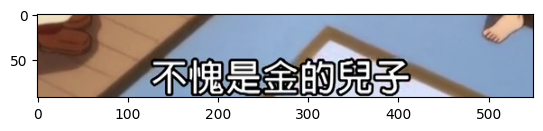

In [40]:
ret, frame = get_frame_n(foo.cap, 11100)
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
plt.figure()
plt.imshow(frame)

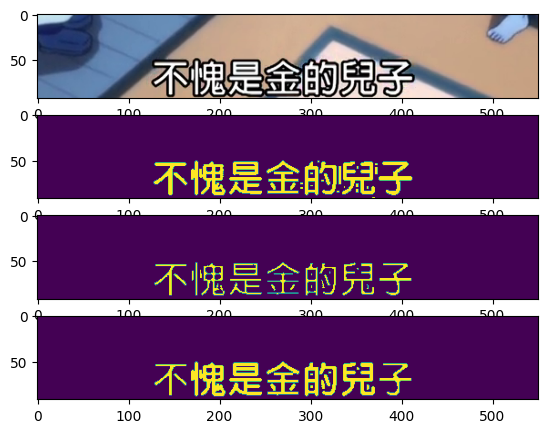

不愧是金的!儿子
##########
不愧是金的儿子
##########
不愧是金的儿子


In [41]:
ocr, ocr_sam, ocr_sam_grow = quick_process_frame_n2(foo.cap, 11100)

In [15]:
from segment_anything import SamAutomaticMaskGenerator
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(frame)

<Figure size 2000x2000 with 0 Axes>

(-0.5, 549.5, 91.5, -0.5)

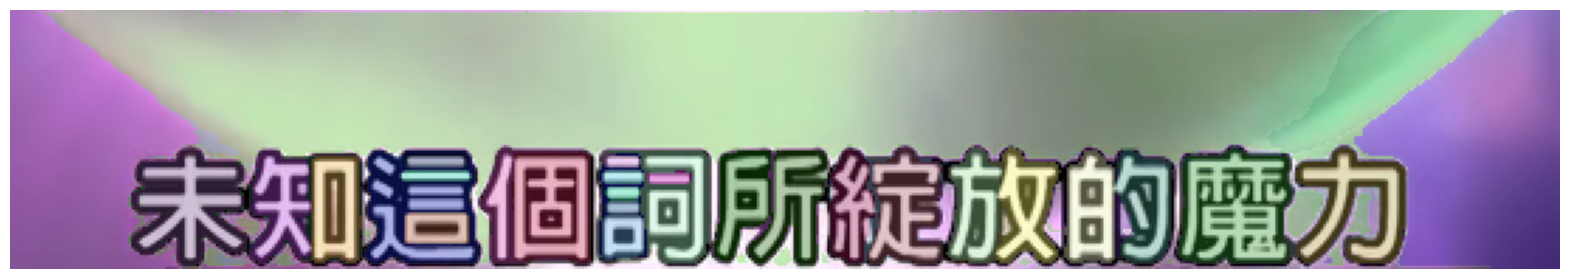

In [16]:
plt.figure(figsize=(20,20))
plt.imshow(frame)
show_anns(masks)
plt.axis('off')
plt.show() 

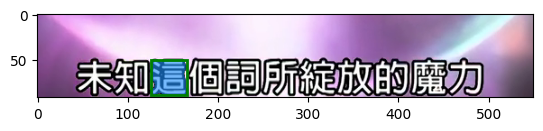

In [17]:
fig, ax = plt.subplots(1, 1)
i = 2
plt.imshow(frame)
show_mask(masks[i]['segmentation'], ax=ax)
show_box(masks[i]['bbox'], ax=ax)

In [83]:
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2], box[3]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))  

In [122]:
def mask_to_char(img, mask, bright_thresh=230):
    """
    Extracts the character from the image, given the mask.
    note that a valid character should have roughly a bbox of w, h = 38, 40
    problem is that sometimes only half of a two radical character is detected.

    """
    # mask is a nice output dict
    seg_mask = mask['segmentation']
    bbox = mask['bbox']
    x, y, w, h = bbox
    bbox_extract_seg_mask = seg_mask[y:y+h, x:x+w]
    bbox_extract = img[y:y+h, x:x+w]
    bbox_extract_gray = cv.cvtColor(bbox_extract, cv.COLOR_RGB2GRAY)
    img_bright = bbox_extract_gray > bright_thresh
    char_mask = img_bright & bbox_extract_seg_mask
    return char_mask  # binary mask of character

In [171]:
len(masks)

40

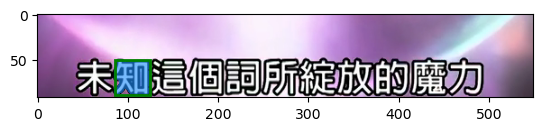

In [175]:
fig, ax = plt.subplots(1, 1)
i = 
plt.imshow(frame)
show_mask(masks[i]['segmentation'], ax=ax)
show_box(masks[i]['bbox'], ax=ax)
# x, y = masks[i]['point_coords'][0]
# ax.scatter(x, y, color='green', marker='*', s=375, edgecolor='white', linewidth=1.25)

w, h = 80, 40


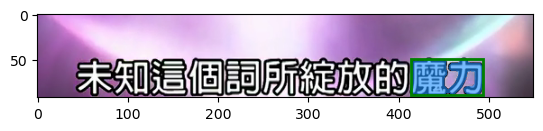

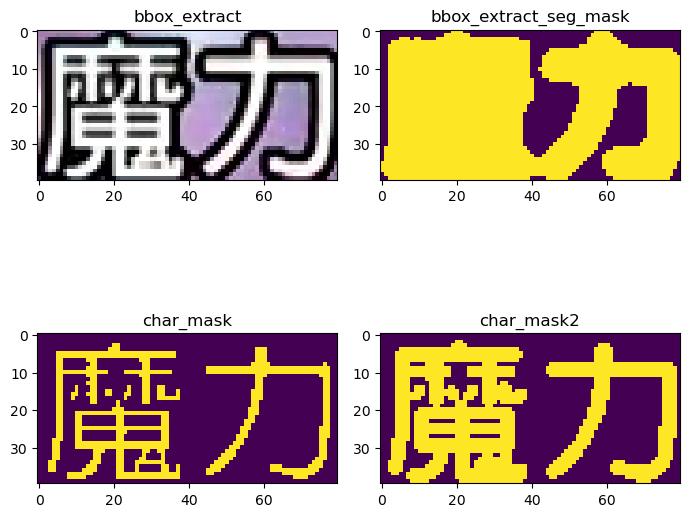

In [188]:
fig, ax = plt.subplots(1, 1)
i = 30
plt.imshow(frame)
show_mask(masks[i]['segmentation'], ax=ax)
show_box(masks[i]['bbox'], ax=ax)
# x, y = masks[i]['point_coords'][0]
# ax.scatter(x, y, color='green', marker='*', s=375, edgecolor='white', linewidth=1.25)

seg_mask = masks[i]['segmentation']
bbox = masks[i]['bbox']
x, y, w, h = bbox
print(f'w, h = {w}, {h}')
temp = np.zeros_like((h, w))
bbox_extract_seg_mask = seg_mask[y:y+h, x:x+w]

bbox_extract = frame[y:y+h, x:x+w]

char_mask = mask_to_char(frame, masks[i], 230)
char_mask2 = grow_thin_binary(char_mask)


# do the above four plots in a 2x2 grid
fig, ax = plt.subplots(2, 2, figsize=(7, 7))

_ = ax[0, 0].imshow(bbox_extract)
_ = ax[0, 0].set_title('bbox_extract')

_ = ax[0, 1].imshow(bbox_extract_seg_mask)
_ = ax[0, 1].set_title('bbox_extract_seg_mask')

_ = ax[1, 0].imshow(char_mask)
_ = ax[1, 0].set_title('char_mask')

_ = ax[1, 1].imshow(char_mask2)
_ = ax[1, 1].set_title('char_mask2')

plt.tight_layout()
plt.show()



w, h = 40, 41


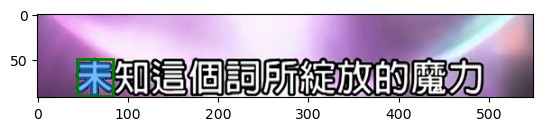

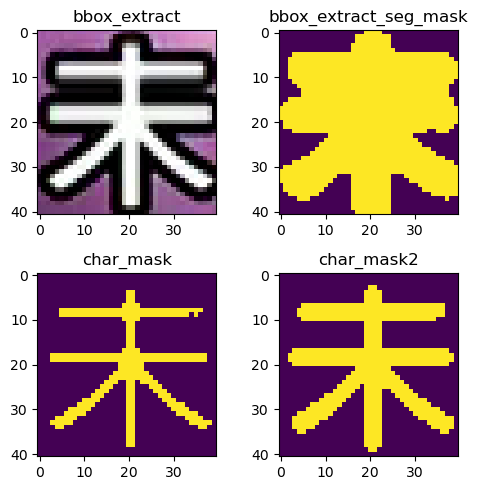

w, h = 39, 39


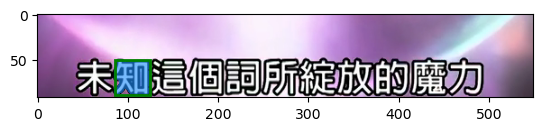

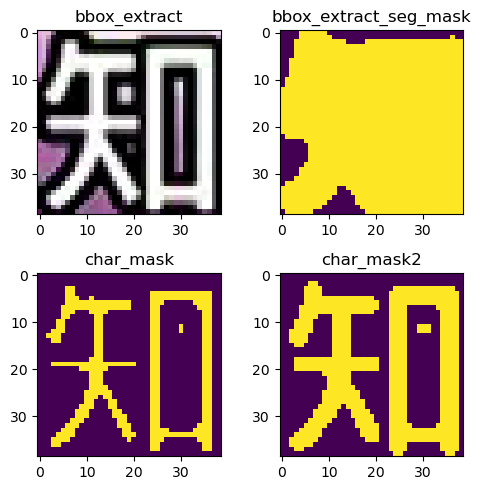

w, h = 40, 39


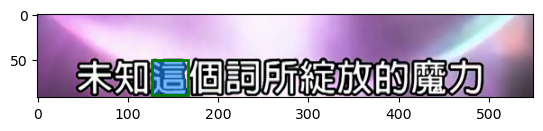

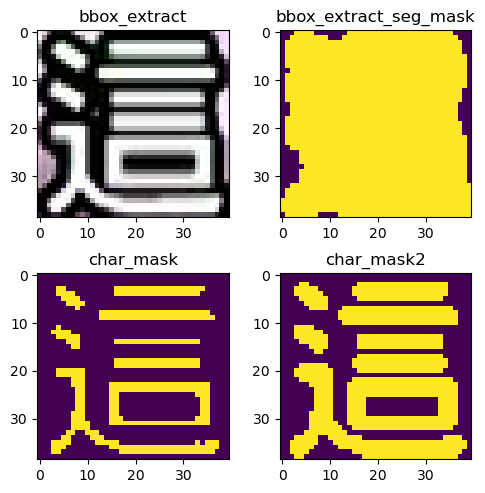

w, h = 38, 40


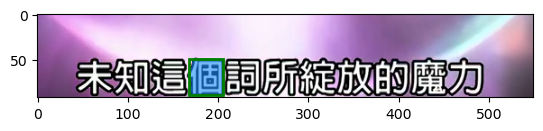

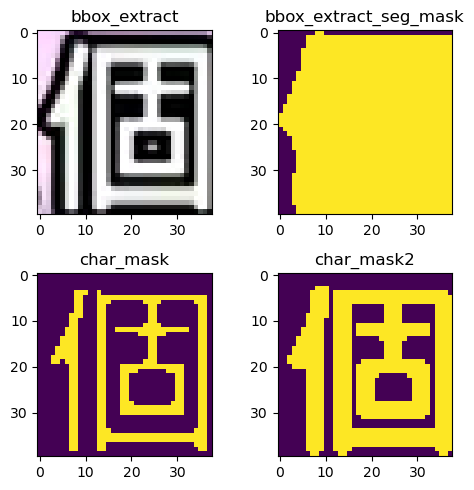

w, h = 38, 39


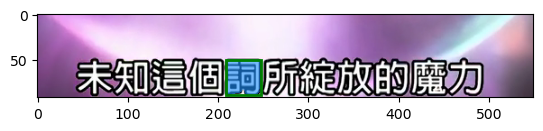

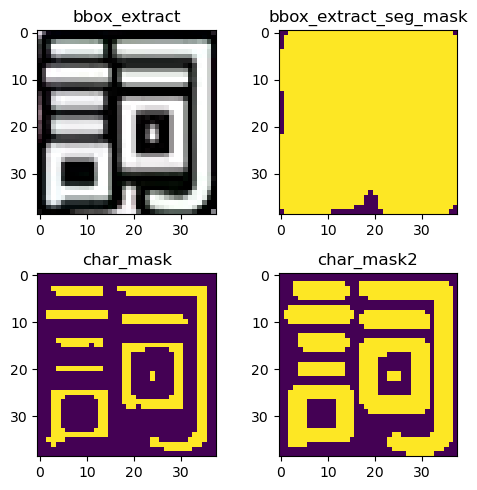

w, h = 40, 39


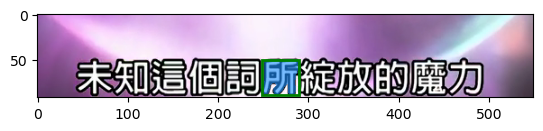

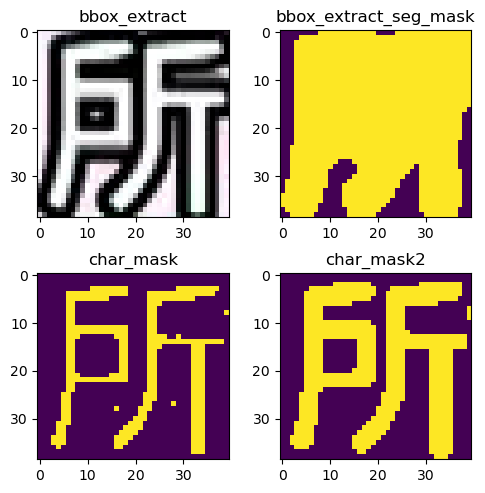

w, h = 39, 40


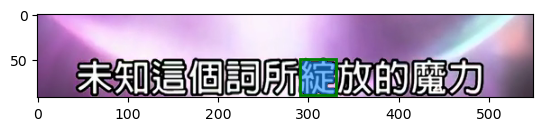

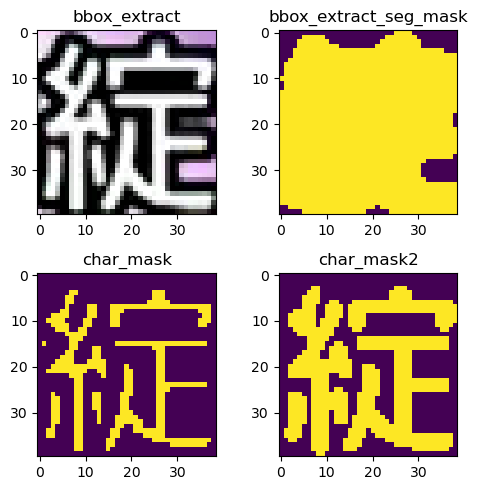

w, h = 40, 40


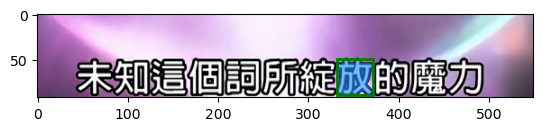

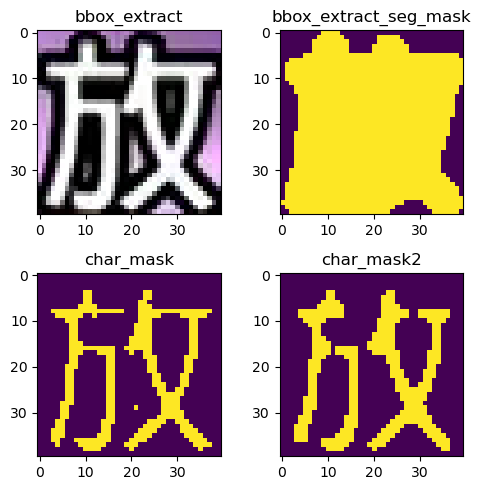

w, h = 38, 39


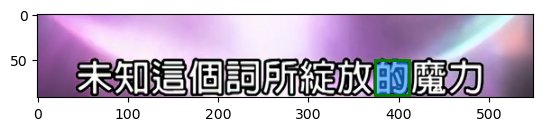

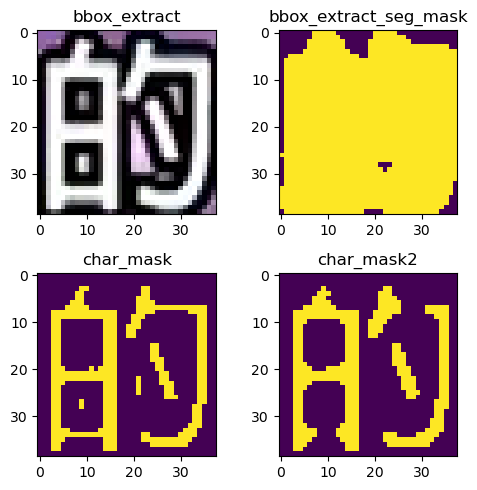

w, h = 40, 40


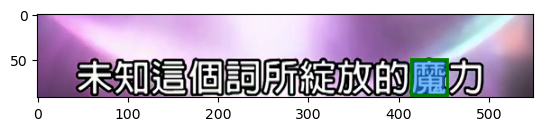

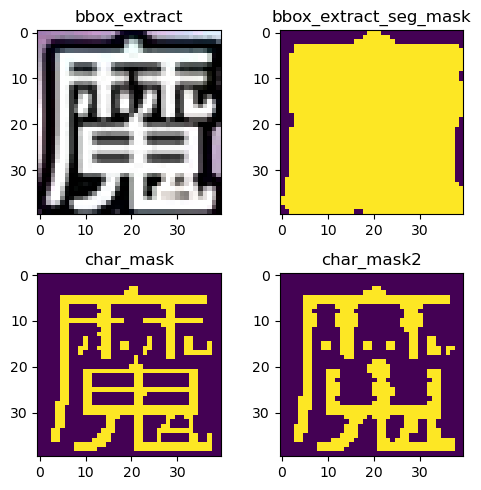

w, h = 38, 40


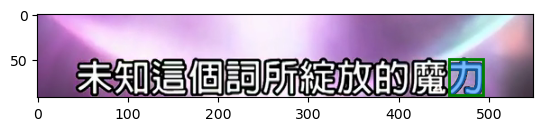

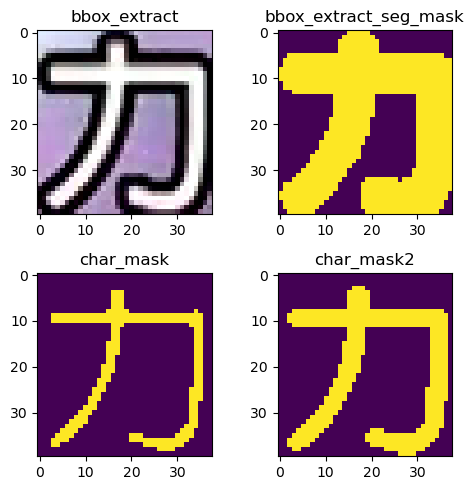

In [191]:
potential_masks = []

for mask in masks:
    seg_mask = mask['segmentation']
    bbox = mask['bbox']
    x, y, w, h = bbox
    if 34 < w < 42 and 36 < h < 44:
        potential_masks.append(mask)

# sort by x coordinate of bbox. At least good for single rows of characters
potential_masks.sort(key=lambda mask: mask['bbox'][0])

for mask in potential_masks:
    seg_mask = mask['segmentation']
    bbox = mask['bbox']
    x, y, w, h = bbox
    if not (34 < w < 42 and 36 < h < 44):
        continue

    print(f'w, h = {w}, {h}')

    fig, ax = plt.subplots(1, 1)
    plt.imshow(frame)
    show_mask(mask['segmentation'], ax=ax)
    show_box(mask['bbox'], ax=ax)

    bbox_extract_seg_mask = seg_mask[y:y+h, x:x+w]
    bbox_extract = frame[y:y+h, x:x+w]

    char_mask = mask_to_char(frame, mask, 230)
    char_mask2 = grow_thin_binary(char_mask)


    # do the above four plots in a 2x2 grid
    fig, ax = plt.subplots(2, 2, figsize=(4,4))

    _ = ax[0, 0].imshow(bbox_extract)
    _ = ax[0, 0].set_title('bbox_extract')

    _ = ax[0, 1].imshow(bbox_extract_seg_mask)
    _ = ax[0, 1].set_title('bbox_extract_seg_mask')

    _ = ax[1, 0].imshow(char_mask)
    _ = ax[1, 0].set_title('char_mask')

    _ = ax[1, 1].imshow(char_mask2)
    _ = ax[1, 1].set_title('char_mask2')

    plt.tight_layout()
    plt.show()



<Figure size 640x480 with 0 Axes>

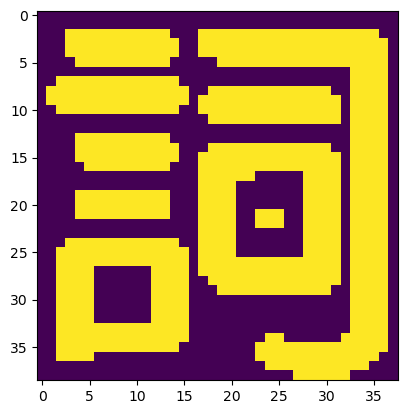

In [165]:
char_mask2 = grow_thin_binary(char_mask)
plt.figure()
plt.imshow(char_mask2)

In [108]:
# convert bbox_extract to grayscale
bbox_extract_gray = cv2.cvtColor(bbox_extract, cv2.COLOR_RGB2GRAY)

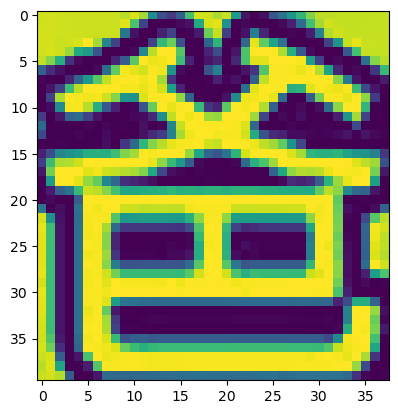

In [109]:
plt.imshow(bbox_extract_gray)

(array([328.,  43.,  15.,  14.,  11.,  27.,   5.,   5.,   4.,  16.,   7.,
          2.,   7.,   0.,  11.,  11.,   3.,   3.,   1.,   7.,   6.,   5.,
          2.,   5.,   4.,   5.,   9.,   4.,   4.,  27.,   8.,   6.,   9.,
          6.,  29.,  13.,  11.,  20.,   7.,   2.,   0.,   2.,   1.,   6.,
          1.,   4.,   1.,   4.,   1.,   2.,   2.,   6.,   4.,   4.,   9.,
          6.,   7.,   1.,   6.,   1.,   5.,   7.,  16.,  10.,   8.,   9.,
          4.,  19.,  21.,  15.,   5.,   8.,   3.,   4.,   7.,   3.,   6.,
          5.,   4.,   4.,   3.,  11.,   6.,   6.,   6.,   7.,   9.,   8.,
          6.,  14.,  23.,  24.,  47.,  19.,  14.,  15.,  19.,  15.,  68.,
        267.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95,  25.5 ,  28.05,  30.6 ,  33.15,  35.7 ,  38.25,
         40.8 ,  43.35,  45.9 ,  48.45,  51.  ,  53.55,  56.1 ,  58.65,
         61.2 ,  63.75,  66.3 ,  68.85,  71.4 ,  73.95,  76.5 ,  79.05,
         81.6 ,  84.15,  86.7 

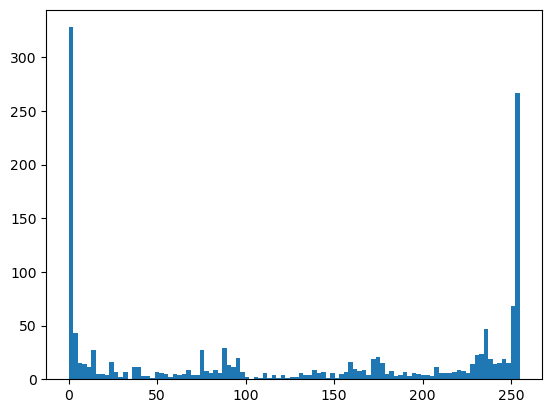

In [110]:
plt.hist(bbox_extract_gray.flatten(), bins=100)

In [115]:
w, h

(38, 40)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

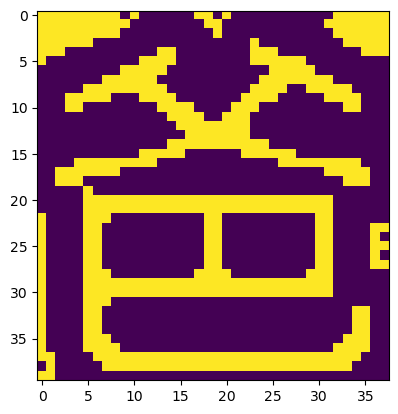

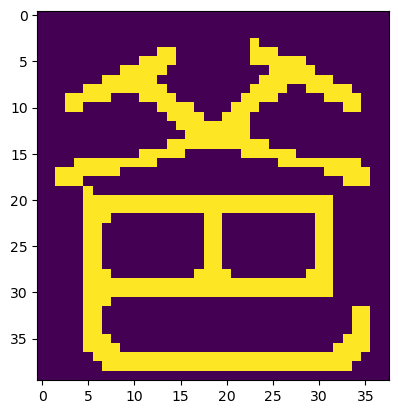

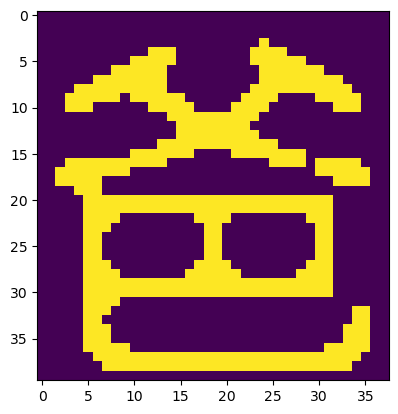

In [114]:
a = bbox_extract_gray > 230
plt.figure()
plt.imshow(a)

b = bbox_extract_seg_mask
plt.figure()
plt.imshow(a & b)

c = grow_thin_binary(a & b)
plt.figure()
plt.imshow(c)


<Figure size 2000x2000 with 0 Axes>

(-0.5, 1279.5, 719.5, -0.5)

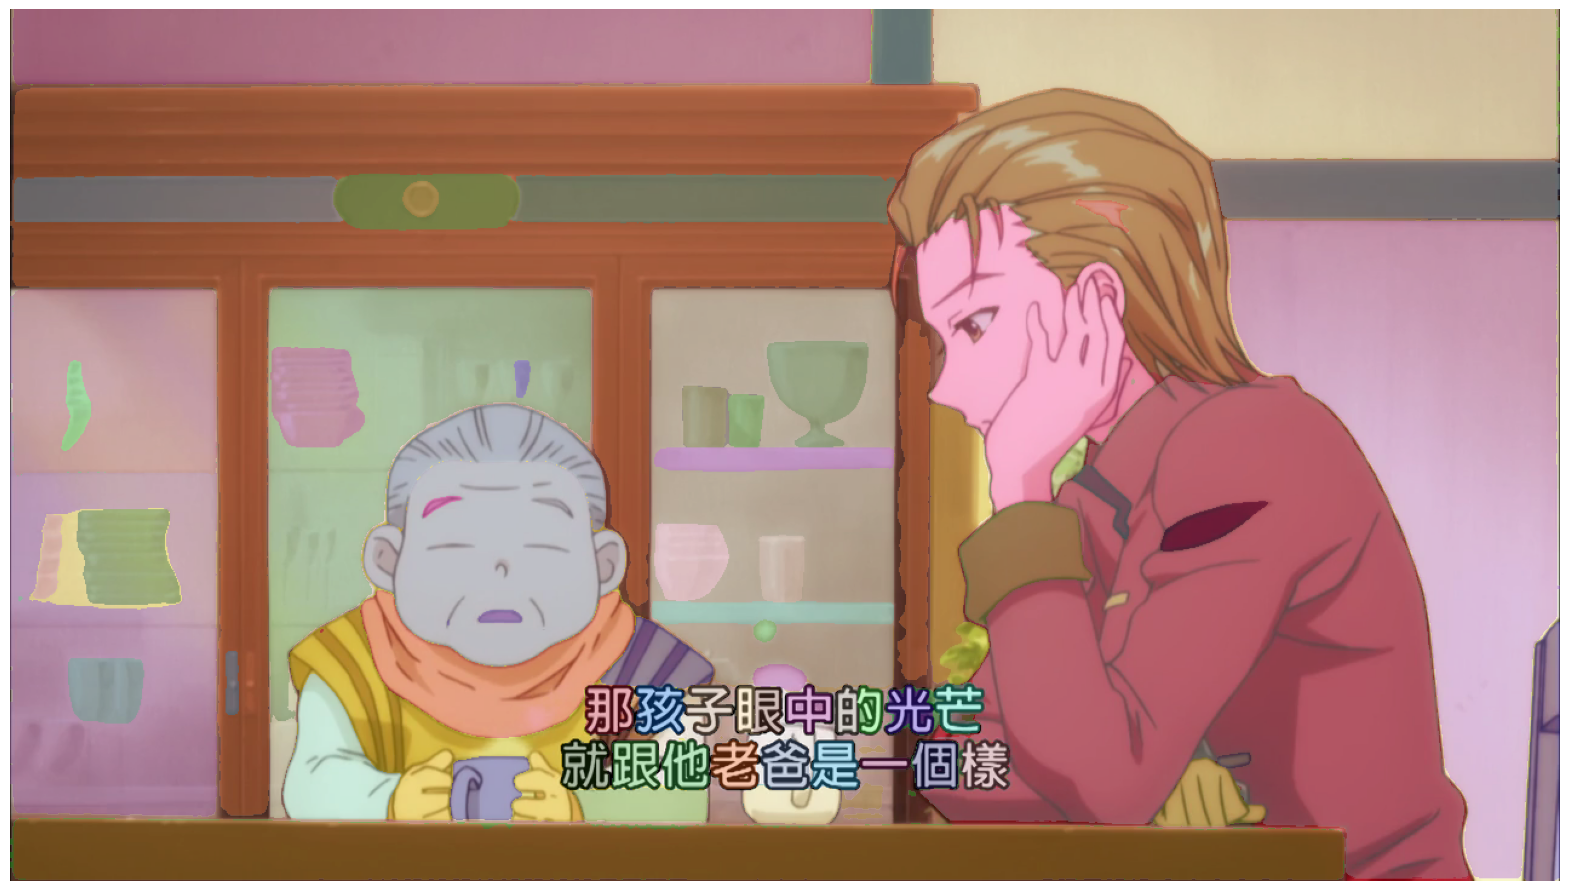

In [50]:
plt.figure(figsize=(20,20))
plt.imshow(frame)
show_anns(masks)
plt.axis('off')
plt.show() 

In [51]:
len(masks)

91

True

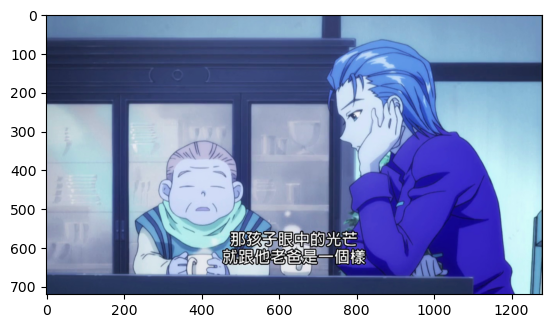

In [43]:
# check that frame is rgb format and not bgr
import cv2
cv2.imwrite('test.jpg', frame)
plt.imshow(cv2.imread('test.jpg'))



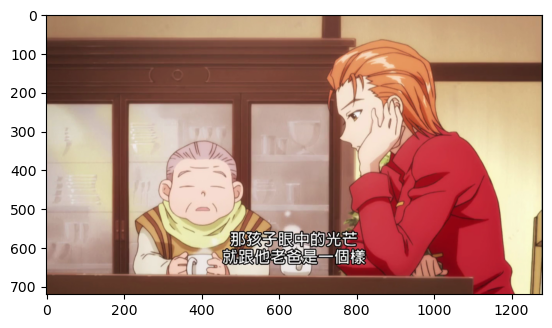

In [44]:
# convert to bgr
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
plt.imshow(frame)